In [1]:
from flows import NVPFlow, DFlow, ResFlow, BNFlow, phase
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X = np.random.normal(size=[10,2])
X[:,0] = (X[:,0] + X[:,1])/2
ystd = 0.5
y = 2*X[:,0] + X[:,1] + 3 + np.random.normal(size=10)*ystd

In [3]:
dim = 3
conf = [[NVPFlow(dim, 'nvp{}'.format(i)),
        ResFlow(dim, 'res{}'.format(i))] for i in range(10)]
appr = DFlow(sum(conf, []))

In [4]:
coefs = appr.output[0]
logl = -tf.square(y - X[:,0]*coefs[0] - X[:,1]*coefs[1] - coefs[2])/(2*ystd**2)
logl = tf.reduce_sum(logl)

In [5]:
def lN(x):
    std = 10.
    s2 = std**2
    tmp = -tf.square(x)/(2*s2) - 0.5*np.log(2*np.pi*s2)
    return tf.reduce_sum(tmp)

In [6]:
gain = logl + lN(coefs) - appr.logdens

In [7]:
opt = tf.train.AdamOptimizer().minimize(-gain)

In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
for _ in range(100):
    for _ in range(5000):
        v, _ = sess.run([gain, opt],{phase: True})
    print(v[0])

-25.028769
-25.465576
-26.04144
-25.35836
-25.363842
-26.583939
-25.923286
-24.189125
-24.757334
-25.368666
-25.330711
-24.879654
-25.362131
-25.730814
-26.201275
-24.302153
-25.5234


KeyboardInterrupt: 

In [10]:
samples = []
for _ in range(10000):
    samples.append(coefs.eval({phase: False}))
samples = np.array(samples)

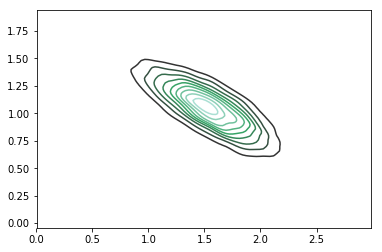

In [11]:
sns.kdeplot(samples[:,0], samples[:,1])
plt.show()